
================================================================================================================
## Module: Machine Learning
### Lectirer: Dr. Ian McLoughlin
### Student: Vitalis Smirnovs
### Student ID: G00317774
================================================================================================================


# Task1
## Computing Square Roots
#### October 5th, 2020: Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places.

===============================================================================================================

Methods of computing square roots are numerical analysis algorithms for finding the principal, or non-negative, square root (usually denoted √S, 2√S, or S1/2) of a real number. Arithmetically, it means given S, a procedure for finding a number which when multiplied by itself, yields S; algebraically, it means a procedure for finding the non-negative root of the equation x2 - S = 0; geometrically, it means given the area of a square, a procedure for constructing a side of the square.

Every real number has two square roots.[Note 1] The principal square root of most numbers is an irrational number with an infinite decimal expansion. As a result, the decimal expansion of any such square root can only be computed to some finite-precision approximation. However, even if we are taking the square root of a perfect square integer, so that the result does have an exact finite representation, the procedure used to compute it may only return a series of increasingly accurate approximations.

The continued fraction representation of a real number can be used instead of its decimal or binary expansion and this representation has the property that the square root of any rational number (which is not already a perfect square) has a periodic, repeating expansion, similar to how rational numbers have repeating expansions in the decimal notation system.

The most common analytical methods are iterative and consist of two steps: finding a suitable starting value, followed by iterative refinement until some termination criteria is met. The starting value can be any number, but fewer iterations will be required the closer it is to the final result. The most familiar such method, most suited for programmatic calculation, is Newton's method, which is based on a property of the derivative in the calculus. A few methods like paper-and-pencil synthetic division and series expansion, do not require a starting value. In some applications, an integer square root is required, which is the square root rounded or truncated to the nearest integer (a modified procedure may be employed in this case).

Procedures for finding square roots (particularly the square root of 2) have been known since at least the period of ancient Babylon in the 17th century BCE. Heron's method from first century Egypt was the first ascertainable algorithm for computing square root. Modern analytic methods began to be developed after introduction of the Arabic numeral system to western Europe in the early Renaissance. Today, nearly all computing devices have a fast and accurate square root function, either as a programming language construct, a compiler intrinsic or library function, or as a hardware operator, based on one of the described procedures.

<a href = "https://en.wikipedia.org/wiki/Square_root">[1]<a>
    <a href = "https://stackoverflow.com/questions/3047012/how-to-perform-square-root-without-using-math-module">[2]<a>
        <a href = "https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra">[3]<a>
           
        
        
        

In [3]:
# adapted from https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra?fbclid=IwAR1kPB2mUWK738A-6V39M5EQ9PIasECH8Rlv3Csa8_0UL-7i9B5HvipP3-Q
def sqroot(number):
    # inflate a number
    s=number*10**200 
    # choose a first guess
    x=s//2
    # while the the difference between the guess squared and the number is not zero:
    while (s-x**2)<0:
        # apply Newton's 
        x=(x-x//s)//2
    # print the result unformated
    print("final x ", x)
    # print the final result formatted
    print(f'{x // 10**100}.{x % 10**100:0100d}')
#call a sqroot function for number 2    
sqroot(2)


final x  11429873912822749822157835483053409594519099948227986612151258432276326359067381956754480218601720296
1.1429873912822749822157835483053409594519099948227986612151258432276326359067381956754480218601720296


### References
[1] https://en.wikipedia.org/wiki/Square_root </br>
[2] https://stackoverflow.com/questions/3047012/how-to-perform-square-root-without-using-math-module \n
[3] https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra \n

## Task2


### Pearson's chi-squared test from scratch with Python:


In [2]:
# import libraries
import numpy as np 
import pandas as pd
import scipy
from scipy.stats import chi2

In [5]:
# create contingency table with floats to avoid datatype issues with pd.DataFrame.at 
ar=np.array([[12.0, 12.0],[11.0, 32.0]])    
df=pd.DataFrame(ar, columns=["Disease", "No Disease"])
df.index=["Exposed", "Unexposed"] 
df

,Disease,No Disease
Exposed,12.0,12.0
Unexposed,11.0,32.0


In [6]:
df2=df.copy() # create contingency table with the marginal totals and the grand total. 
df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
df2

,Disease,No Disease,Row_Total
Exposed,12.0,12.0,24.0
Unexposed,11.0,32.0,43.0
Column_Total,23.0,44.0,67.0


In [23]:

n=df2.at["Column_Total", "Row_Total"]  # grand total 
n2=df2.iloc[2,2]

exp=df2.copy()               # create dataframe with expected counts
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        # round expected values to 6 decimal places to get the maximum available precision:
        v= (((df2.at[x, "Row_Total"]) * (df2.at["Column_Total", y])   )   /n ).round(6) 
        exp.at[x,y]=float(v)

exp = exp.iloc[[0, 1], [0, 1]]
exp
print(n)
print(n2)

67.0
67.0


In [8]:
tstat = np.sum(((df-exp)**2/exp).values) # calculate chi-squared test statistic
tstat

4.0739497437848415

In [9]:
dof = (len(df.columns)-1)*(len(df.index)-1) # determine degrees of freedom 
dof

1

In [10]:
pval=1-chi2.cdf(tstat, dof) # subtract the cumulative distribution function from 1
pval

0.043549331095157795

In [11]:
from scipy.stats import chi2_contingency # import Scipy's built-in function

tstat_scipy,pval_scipy,ddof_scipy,exp_scipy=chi2_contingency(df, correction=False) # "correction=False" means no Yates' correction is used! 
print("Chi-squared test statistic without Yates correction (Scipy): " + str(tstat_scipy))
print("P-value without Yates correction (Scipy): " + str(pval_scipy))

Chi-squared test statistic without Yates correction (Scipy): 4.073949811563561
P-value without Yates correction (Scipy): 0.043549329347933916


## Chi-squared test with Yates correction:

### All the aforementioned steps are basically the same but we use the following (adjusted) formula to determine our test statistic:

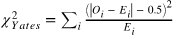




In [13]:
df

,Disease,No Disease
Exposed,12.0,12.0
Unexposed,11.0,32.0


In [14]:
exp


,Disease,No Disease
Exposed,8.238806,15.761194
Unexposed,14.761194,28.238806


In [15]:
dof = (len(df.columns)-1)*(len(df.index)-1)
dof

1

In [16]:
# Apply Yates' correction by subtracting 0.5 from the absolute difference between observed and expected counts: 
tstat_yates= np.sum((((np.abs(df-exp)-0.5)**2)  / (exp)).values)
print("Chi-squared test statistic with Yates correction: " + str(tstat_yates))

pval=1-   chi2.cdf(tstat_yates, dof)
print("P-value with Yates correction: " + str(pval))

Chi-squared test statistic with Yates correction: 3.0627917403923197
P-value with Yates correction: 0.08010393193120602


In [24]:

from scipy.stats import chi2_contingency
tstat_scipy,pval_scipy,ddof_scipy,exp_scipy=chi2_contingency(df, correction=True)# "correction=True" to apply Yates' correction
print("Chi-squared test statistic with Yates correction (Scipy): " + str(tstat_scipy))
print("P-value with Yates correction (Scipy): " + str(pval_scipy))

Chi-squared test statistic with Yates correction (Scipy): 3.062791798801972
P-value with Yates correction (Scipy): 0.08010392905209013


## (Fisher's exact test)

### Fisher's exact test would give us the following p-value:

In [25]:
import scipy.stats as stats

oddsratio, pvalue_fisher = stats.fisher_exact(df)   
pvalue_fisher

0.061104061670370635